## Data Acquisition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import os

In [7]:
WORKDIR = "/content/drive/MyDrive/Learning/Bioinformatics/Gene-Expression-for-Cancer-Analysis"
DATA_DIR = os.path.join(WORKDIR, "GSE103512")

In [9]:
df_assay = pd.read_csv(os.path.join(DATA_DIR, "assay_gse103512.csv"), delimiter=";", decimal=",")
df_colData = pd.read_csv(os.path.join(DATA_DIR, "colData_gse103512.csv"), delimiter=";")
df_rowData = pd.read_csv(os.path.join(DATA_DIR, "rowData_gse103512.csv"), delimiter=";")

<ipython-input-9-0ba6a71809eb>:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rowData = pd.read_csv(os.path.join(DATA_DIR, "rowData_gse103512.csv"), delimiter=";")


In [10]:
df_assay = df_assay.T

In [15]:
df_colData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   280 non-null    object
 1   title                        280 non-null    object
 2   geo_accession                280 non-null    object
 3   status                       280 non-null    object
 4   submission_date              280 non-null    object
 5   last_update_date             280 non-null    object
 6   type                         280 non-null    object
 7   channel_count                280 non-null    int64 
 8   source_name_ch1              280 non-null    object
 9   organism_ch1                 280 non-null    object
 10  characteristics_ch1          280 non-null    object
 11  characteristics_ch1.1        280 non-null    object
 12  characteristics_ch1.2        280 non-null    object
 13  characteristics_ch1.3        280 no

In [16]:
df_rowData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54715 entries, 0 to 54714
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        54715 non-null  object
 1   ID                                54715 non-null  object
 2   GB_ACC                            54613 non-null  object
 3   SPOT_ID                           102 non-null    object
 4   Species.Scientific.Name           54715 non-null  object
 5   Annotation.Date                   54675 non-null  object
 6   Sequence.Type                     54675 non-null  object
 7   Sequence.Source                   54675 non-null  object
 8   Target.Description                54698 non-null  object
 9   Representative.Public.ID          54675 non-null  object
 10  Gene.Title                        41796 non-null  object
 11  Gene.Symbol                       41796 non-null  object
 12  ENTREZ_GENE_ID    

In [13]:
df_assay.columns = df_assay.iloc[0, :]
df_assay = df_assay[1:]

In [14]:
df_assay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, GSM2772660 to GSM2772939
Columns: 54715 entries, 1007_PM_s_at to AFFX-TrpnX-M_at
dtypes: object(54715)
memory usage: 116.9+ MB


In [17]:
df_assay

Unnamed: 0,1007_PM_s_at,1053_PM_at,117_PM_at,121_PM_at,1255_PM_g_at,1294_PM_at,1316_PM_at,1320_PM_at,1405_PM_i_at,1431_PM_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
GSM2772660,8.710718,4.646897,6.850312,5.699862,3.344434,5.868637,6.328466,6.208219,3.132818,3.733856,...,3.117956,3.047157,3.071249,3.569393,5.401454,3.503531,3.809207,3.265365,3.025283,4.046307
GSM2772661,8.874406,5.94673,7.420204,5.955848,3.252921,6.131208,6.503984,5.571839,3.415128,3.539647,...,3.535316,3.431708,3.685181,4.022193,5.67056,3.754342,4.016082,3.339168,3.184374,4.29974
GSM2772662,9.1576,5.769209,7.277934,5.819856,3.12131,6.343273,6.757951,6.507097,3.778575,3.438108,...,3.209264,3.330659,3.477734,3.791581,5.312411,3.62142,3.787557,3.307359,2.999147,3.977641
GSM2772663,7.710366,4.51261,7.036745,5.992074,3.304214,6.55346,6.548922,6.19972,3.466669,3.700839,...,3.221393,3.341041,3.404597,3.543309,5.394079,3.597073,3.889417,3.185923,3.092109,4.053675
GSM2772664,7.889133,6.000142,7.08563,5.965098,3.206685,6.51426,6.122024,6.203894,3.514805,3.702347,...,3.215291,3.566731,3.312801,3.549559,5.30496,3.450297,3.895821,3.195152,2.97114,4.000778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2772935,7.750079,4.173053,6.424754,6.619358,3.114041,6.403276,6.887373,6.472842,3.430526,3.478233,...,3.090263,3.067836,3.678365,3.344181,5.105038,3.388442,3.699432,3.055493,3.028562,4.04793
GSM2772936,7.864324,4.259325,6.478735,7.989656,3.135294,6.953802,7.364023,6.76164,3.282007,4.105242,...,3.355941,3.212776,3.136699,3.973577,5.233263,3.724406,3.789657,3.203055,3.089924,3.993888
GSM2772937,7.541111,4.522224,6.865915,6.025906,3.328501,7.491566,7.143206,6.799355,3.479946,4.05375,...,3.488553,3.260856,4.134082,3.819999,4.961615,3.739153,3.757168,3.348073,3.215887,4.19695
GSM2772938,8.390298,4.355016,6.765574,6.136103,3.282186,7.041392,6.903466,6.475198,3.185831,3.742345,...,3.338271,2.960611,3.291691,3.647019,5.391048,3.670171,3.974066,3.165001,3.308247,4.118002


In [18]:
pd.options.display.max_columns = None
display(df_colData.sample(5))
pd.reset_option("all")

,Unnamed: 0,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,characteristics_ch1.1,characteristics_ch1.2,characteristics_ch1.3,characteristics_ch1.4,characteristics_ch1.5,characteristics_ch1.6,characteristics_ch1.7,characteristics_ch1.8,characteristics_ch1.9,characteristics_ch1.10,characteristics_ch1.11,characteristics_ch1.12,characteristics_ch1.13,characteristics_ch1.14,characteristics_ch1.15,characteristics_ch1.16,characteristics_ch1.17,characteristics_ch1.18,characteristics_ch1.19,characteristics_ch1.20,treatment_protocol_ch1,growth_protocol_ch1,molecule_ch1,extract_protocol_ch1,label_ch1,label_protocol_ch1,taxid_ch1,hyb_protocol,scan_protocol,data_processing,platform_id,contact_name,contact_department,contact_institute,contact_address,contact_city,contact_state,contact_zip.postal_code,contact_country,supplementary_file,data_row_count,age.ch1,batch.i.ii.ch1,bmi.ch1,bodyheight.ch1,cancer.type.ch1,dignity.ch1,diseasecode.ch1,diseasedescription.ch1,gender.ch1,grading.ch1,histology.ch1,ischemiatime.ch1,normal.ch1,organ.ch1,primary...relapse.tumor.ch1,radicality.ch1,Stage.ch1,tumorcontent.ch1,tumorlocalization.ch1,tumorsize.ch1,weight.ch1
64,GSM2772724,X1840-Tp11,GSM2772724,Public on Sep 07 2017,Sep 05 2017,Jan 23 2018,RNA,1,Total RNA Seq profiling of sample,Homo sapiens,cancer type: BC,normal: no,batch i/ii: I,histology: ductal carcinoma,age: 75,gender: f,weight: 79,bodyheight: 173,bmi: 26,diseasecode: C50.8,diseasedescription: malignant neoplasm of over...,primary / relapse tumor: primary tumor,tumorsize: 3.2,ischemiatime: 4,tumorcontent: 0.6,organ: breast right,tumorlocalization: several partitions overlapping,Stage: IIA,radicality: R0,grading: G3,dignity: malign,Tumor samples were formalin-fixed and paraffin...,Samples were extracted from tumor or adjacent ...,total RNA,Extraction was done using High Pure FFPET RNA ...,biotin,Biotin-Labeling and enzymatic fragmentation,9606,3 ug (15 ul) labeled cDNA + 105ul Master Mix....,Scanning was done using GeneTitan Instrument,The CEL files were normalized and summarized i...,GPL13158,"Wei-Yi,,Cheng",Pharma Research and Early Development,Roche Innovation Center New York,Roche Translational and Clinical Research Cent...,New York,New York,10016,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2772...,54715,75,I,26,173,BC,malign,C50.8,malignant neoplasm of overlapping lesion of br...,f,G3,ductal carcinoma,4,no,breast right,primary tumor,R0,IIA,0.6,several partitions overlapping,3.2,79
127,GSM2772787,CRC_coex_path_003,GSM2772787,Public on Sep 07 2017,Sep 05 2017,Jan 23 2018,RNA,1,Total RNA Seq profiling of sample,Homo sapiens,cancer type: CRC,normal: no,batch i/ii: I,histology: na,age: na,gender: na,weight: na,bodyheight: na,bmi: na,diseasecode: na,diseasedescription: na,primary / relapse tumor: na,tumorsize: na,ischemiatime: na,tumorcontent: na,organ: na,tumorlocalization: na,Stage: na,radicality: na,grading: na,dignity: na,Tumor samples were formalin-fixed and paraffin...,Samples were extracted from tumor or adjacent ...,total RNA,Extraction was done using High Pure FFPET RNA ...,biotin,Biotin-Labeling and enzymatic fragmentation,9606,3 ug (15 ul) labeled cDNA + 105ul Master Mix....,Scanning was done using GeneTitan Instrument,The CEL files were normalized and summarized i...,GPL13158,"Wei-Yi,,Cheng",Pharma Research and Early Development,Roche Innovation Center New York,Roche Translational and Clinical Research Cent...,New York,New York,10016,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM2772...,54715,na,I,na,na,CRC,na,na,na,na,na,na,na,no,na,na,na,na,na,na,na,na
228,GSM2772888,M628-TS13,GSM2772888,Public on Sep 07 2017,Sep 05 2017,Jan 23 2018,RNA,1,Total RNA Seq profiling of sample,Homo sapiens,cancer type: PCA,normal: no,histology: adenocarcinoma with acinar type,age: 66,gender: m,weight: 64,bodyheight: 162,bmi: 24,diseasecode: C61,diseasedescription: malignant neoplasm of pros...,primary / relapse tumor: prima

<ipython-input-18-7dfcf0f18721>:3: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option("all")
<ipython-input-18-7dfcf0f18721>:3: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option("all")
<ipython-input-18-7dfcf0f18721>:3: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option("all")


In [19]:
df_cancer_label = df_colData[["geo_accession", "characteristics_ch1"]]

In [20]:
display(df_colData["primary...relapse.tumor.ch1"].value_counts())
print()
display(df_colData["characteristics_ch1"].value_counts())
print()
display(df_colData["characteristics_ch1.20"].value_counts())
print()
# display(df_colData["age.ch1"].value_counts())
# print()
# display(df_colData["bmi.ch1"].value_counts())
# print()
# display(df_colData["bodyheight.ch1"].value_counts())
# print()
display(df_colData["cancer.type.ch1"].value_counts())
print()
display(df_colData["dignity.ch1"].value_counts())
print()
display(df_colData["gender.ch1"].value_counts())
print()
display(df_colData["organ.ch1"].value_counts())
print()
display(df_colData["Stage.ch1"].value_counts())
print()
display(df_colData["tumorcontent.ch1"].value_counts())
print()
display(df_colData["tumorlocalization.ch1"].value_counts())

primary tumor    217
na                63
Name: primary...relapse.tumor.ch1, dtype: int64

cancer type: BC       75
cancer type: CRC      69
cancer type: NSCLC    69
cancer type: PCA      67
Name: characteristics_ch1, dtype: int64

dignity: malign    165
dignity: na         45
Name: characteristics_ch1.20, dtype: int64

BC       75
CRC      69
NSCLC    69
PCA      67
Name: cancer.type.ch1, dtype: int64

malign    217
na         63
Name: dignity.ch1, dtype: int64

m     111
f     106
na     63
Name: gender.ch1, dtype: int64

na              63
colon           55
lung            55
prostate        50
breast left     29
breast right    28
Name: organ.ch1, dtype: int64

IV       64
na       63
II       36
IB       24
IIA      18
III B    17
I        15
III A    12
IIB      11
III      10
IA        5
III C     4
Name: Stage.ch1, dtype: int64

na      63
0.5     37
0.3     36
0.7     34
0.4     31
0.6     25
0.8     15
0.45    10
0.35    10
0.75     6
0.55     6
0.25     2
0.65     2
0.9      2
0.85     1
Name: tumorcontent.ch1, dtype: int64

na                                         63
prostate several partitions overlapping    46
upper-outer quadrant                       21
rectum                                     19
sigmoid colon                              15
several partitions overlapping             13
upper pulmonary lobe left                  11
ascending colon                            10
upper-inner quadrant                        9
lower pulmonary lobe left                   9
central portion                             8
superior pulmonary lobe right S I           8
ileocaecal                                  6
lower-outer quadrant                        5
middle pulmonary lobe right                 4
inferior pulmonary lobe left S VI           3
lower pulmonary lobe right                  3
inferior pulmonary lobe left S VIII         2
superior pulmonary lobe right S III         2
inferior pulmonary lobe left S X            2
inferior pulmonary lobe right S X           2
upper pulmonary lobe right        

In [21]:
# df_assay

In [22]:
df_cancer_label = df_cancer_label.set_index("geo_accession")
df_cancer_label

,characteristics_ch1
geo_accession,
GSM2772660,cancer type: BC
GSM2772661,cancer type: BC
GSM2772662,cancer type: BC
GSM2772663,cancer type: BC
GSM2772664,cancer type: BC
...,...
GSM2772935,cancer type: PCA
GSM2772936,cancer type: PCA
GSM2772937,cancer type: PCA


In [23]:
df_cancer_label["characteristics_ch1"].unique()

array(['cancer type: BC', 'cancer type: CRC', 'cancer type: NSCLC',
       'cancer type: PCA'], dtype=object)

In [24]:
from pandas.api.types import is_numeric_dtype

# for col in df_assay.columns:
#     if not is_numeric_dtype(col):
#         print(col)

df_assay = df_assay.astype(np.float32)

In [25]:
df_assay.index.name = "geo_accession"
df_assay.index

Index(['GSM2772660', 'GSM2772661', 'GSM2772662', 'GSM2772663', 'GSM2772664',
       'GSM2772665', 'GSM2772666', 'GSM2772667', 'GSM2772668', 'GSM2772669',
       ...
       'GSM2772930', 'GSM2772931', 'GSM2772932', 'GSM2772933', 'GSM2772934',
       'GSM2772935', 'GSM2772936', 'GSM2772937', 'GSM2772938', 'GSM2772939'],
      dtype='object', name='geo_accession', length=280)

In [26]:
df_cancer_label.index

Index(['GSM2772660', 'GSM2772661', 'GSM2772662', 'GSM2772663', 'GSM2772664',
       'GSM2772665', 'GSM2772666', 'GSM2772667', 'GSM2772668', 'GSM2772669',
       ...
       'GSM2772930', 'GSM2772931', 'GSM2772932', 'GSM2772933', 'GSM2772934',
       'GSM2772935', 'GSM2772936', 'GSM2772937', 'GSM2772938', 'GSM2772939'],
      dtype='object', name='geo_accession', length=280)

In [27]:
genes = list(df_assay.columns)

In [28]:
df = pd.merge(right=df_cancer_label, left=df_assay, left_index=True, right_index=True)
df

,1007_PM_s_at,1053_PM_at,117_PM_at,121_PM_at,1255_PM_g_at,1294_PM_at,1316_PM_at,1320_PM_at,1405_PM_i_at,1431_PM_at,...,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,characteristics_ch1
geo_accession,,,,,,,,,,,,,,,,,,,,,
GSM2772660,8.710718,4.646897,6.850312,5.699862,3.344434,5.868637,6.328465,6.208219,3.132818,3.733856,...,3.047157,3.071249,3.569393,5.401454,3.503531,3.809207,3.265365,3.025283,4.046307,cancer type: BC
GSM2772661,8.874406,5.946731,7.420204,5.955848,3.252921,6.131208,6.503983,5.571839,3.415128,3.539647,...,3.431708,3.685181,4.022192,5.670559,3.754342,4.016082,3.339168,3.184374,4.299740,cancer type: BC
GSM2772662,9.157599,5.769209,7.277934,5.819856,3.121310,6.343273,6.757951,6.507097,3.778575,3.438108,...,3.330659,3.477734,3.791581,5.312411,3.621420,3.787557,3.307359,2.999147,3.977641,cancer type: BC
GSM2772663,7.710366,4.512610,7.036745,5.992074,3.304214,6.553460,6.548923,6.199720,3.466669,3.700839,...,3.341041,3.404597,3.543309,5.394079,3.597073,3.889417,3.185923,3.092109,4.053675,cancer type: BC
GSM2772664,7.889133,6.000142,7.085629,5.965098,3.206685,6.514260,6.122024,6.203895,3.514805,3.702347,...,3.566731,3.312801,3.549559,5.304960,3.450297,3.895821,3.195152,2.971140,4.000778,cancer type: BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2772935,7.750079,4.173053,6.424755,6.619358,3.114041,6.403276,6.887373,6.472842,3.430526,3.478233,...,3.067836,3.678365,3.344181,5.105039,3.388442,3.699432,3.055493,3.028562,4.047930,cancer type: PCA
GSM2772936,7.864324,4.259325,6.478735,7.989655,3.135294,6.953802,7.364023,6.761640,3.282007,4.105242,...,3.212776,3.136699,3.973577,5.233263,3.724406,3.789657,3.203055,3.089924,3.993888,cancer type: PCA
GSM2772937,7.541111,4.522224,6.865915,6.025906,3.328501,7.491566,7.143206,6.799355,3.479946,4.053750,...,3.260856,4.134082,3.819999,4.961615,3.739153,3.757168,3.348073,3.215887,4.196950,cancer type: PCA


In [29]:
map_cancer = {
    "cancer type: BC": "Breast Cancer",
    "cancer type: CRC": "Colorectal Cancer",
    "cancer type: NSCLC": "Non-Small Cell Lung Cancer",
    "cancer type: PCA": "Prostate Cancer",
}

df["cancer_type"] = df["characteristics_ch1"].map(lambda x: map_cancer[x])
df

,1007_PM_s_at,1053_PM_at,117_PM_at,121_PM_at,1255_PM_g_at,1294_PM_at,1316_PM_at,1320_PM_at,1405_PM_i_at,1431_PM_at,...,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,characteristics_ch1,cancer_type
geo_accession,,,,,,,,,,,,,,,,,,,,,
GSM2772660,8.710718,4.646897,6.850312,5.699862,3.344434,5.868637,6.328465,6.208219,3.132818,3.733856,...,3.071249,3.569393,5.401454,3.503531,3.809207,3.265365,3.025283,4.046307,cancer type: BC,Breast Cancer
GSM2772661,8.874406,5.946731,7.420204,5.955848,3.252921,6.131208,6.503983,5.571839,3.415128,3.539647,...,3.685181,4.022192,5.670559,3.754342,4.016082,3.339168,3.184374,4.299740,cancer type: BC,Breast Cancer
GSM2772662,9.157599,5.769209,7.277934,5.819856,3.121310,6.343273,6.757951,6.507097,3.778575,3.438108,...,3.477734,3.791581,5.312411,3.621420,3.787557,3.307359,2.999147,3.977641,cancer type: BC,Breast Cancer
GSM2772663,7.710366,4.512610,7.036745,5.992074,3.304214,6.553460,6.548923,6.199720,3.466669,3.700839,...,3.404597,3.543309,5.394079,3.597073,3.889417,3.185923,3.092109,4.053675,cancer type: BC,Breast Cancer
GSM2772664,7.889133,6.000142,7.085629,5.965098,3.206685,6.514260,6.122024,6.203895,3.514805,3.702347,...,3.312801,3.549559,5.304960,3.450297,3.895821,3.195152,2.971140,4.000778,cancer type: BC,Breast Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM2772935,7.750079,4.173053,6.424755,6.619358,3.114041,6.403276,6.887373,6.472842,3.430526,3.478233,...,3.678365,3.344181,5.105039,3.388442,3.699432,3.055493,3.028562,4.047930,cancer type: PCA,Prostate Cancer
GSM2772936,7.864324,4.259325,6.478735,7.989655,3.135294,6.953802,7.364023,6.761640,3.282007,4.105242,...,3.136699,3.973577,5.233263,3.724406,3.789657,3.203055,3.089924,3.993888,cancer type: PCA,Prostate Cancer
GSM2772937,7.541111,4.522224,6.865915,6.025906,3.328501,7.491566,7.143206,6.799355,3.479946,4.053750,...,4.134082,3.819999,4.961615,3.739153,3.757168,3.348073,3.215887,4.196950,cancer type: PCA,Prostate Cancer


## Visualization by Dimension Reduction

### PCA

In [30]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[genes].values)

df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
df['pca-three'] = pca_result[:, 2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.16016057 0.1017152  0.07334497]


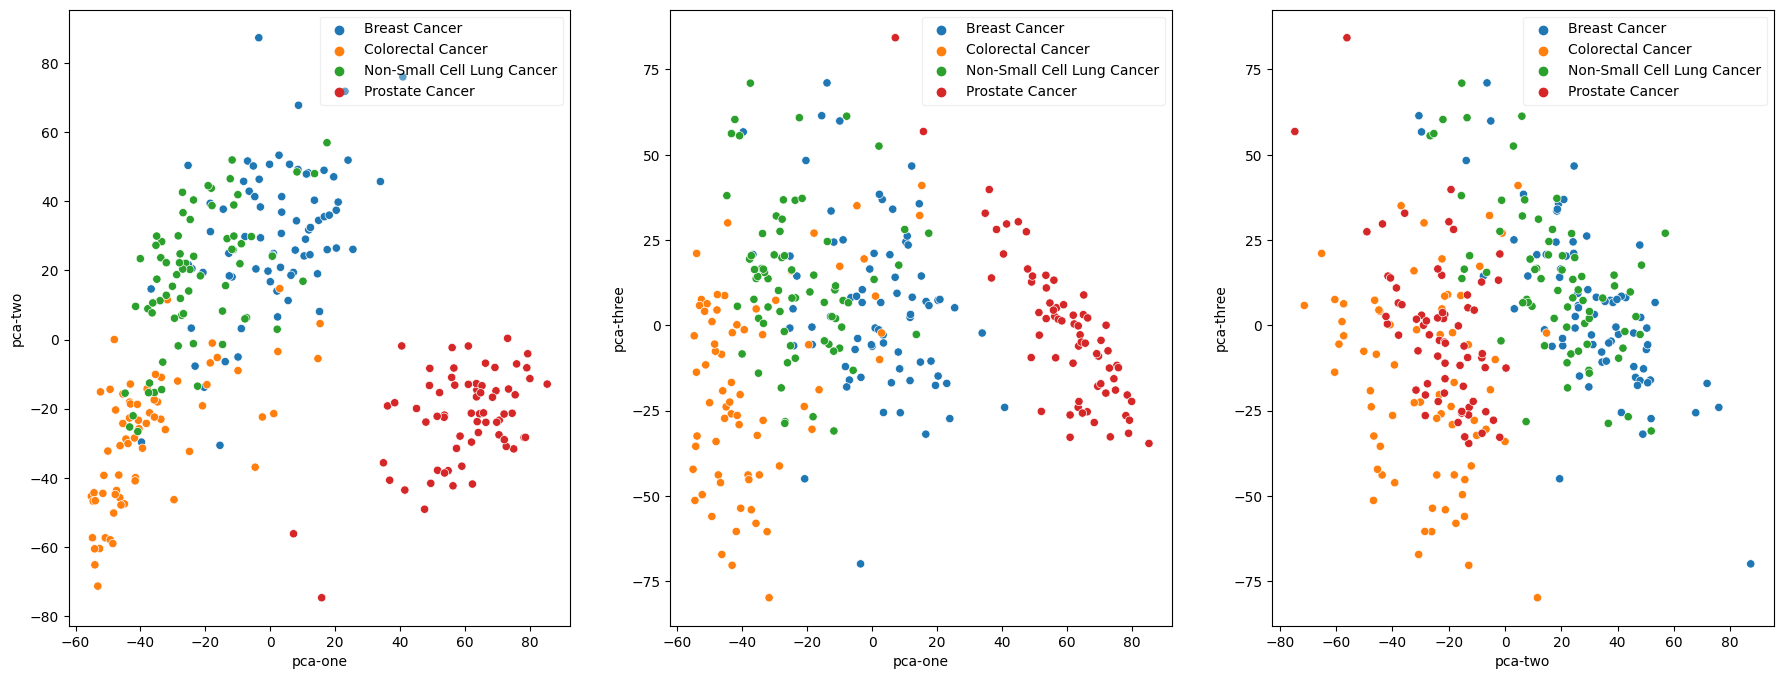

In [31]:
# random_permutation = np.random.permutation(df.shape[0])

plt.figure(figsize=(22, 8))

pca_combs = [("pca-one", "pca-two"), ("pca-one", "pca-three"), ("pca-two", "pca-three")]
for i, comb in enumerate(pca_combs):
    ax = plt.subplot(1, 3, i+1)
    sns.scatterplot(
        x=comb[0], y=comb[1],
        hue="cancer_type",
        # palette=sns.color_palette("hls", 10),
        palette=sns.color_palette("tab10", 4),
        data=df,
        legend="full",
        ax=ax
    )
    plt.legend(loc="upper right", framealpha=0.3)

### t-SNE

In [32]:
import time
from sklearn.manifold import TSNE

In [33]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df[genes].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 280 samples in 0.098s...
[t-SNE] Computed neighbors for 280 samples in 1.563s...
[t-SNE] Computed conditional probabilities for sample 280 / 280
[t-SNE] Mean sigma: 39.971842
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.850983
[t-SNE] KL divergence after 300 iterations: 0.421091
t-SNE done! Time elapsed: 3.4854559898376465 seconds


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

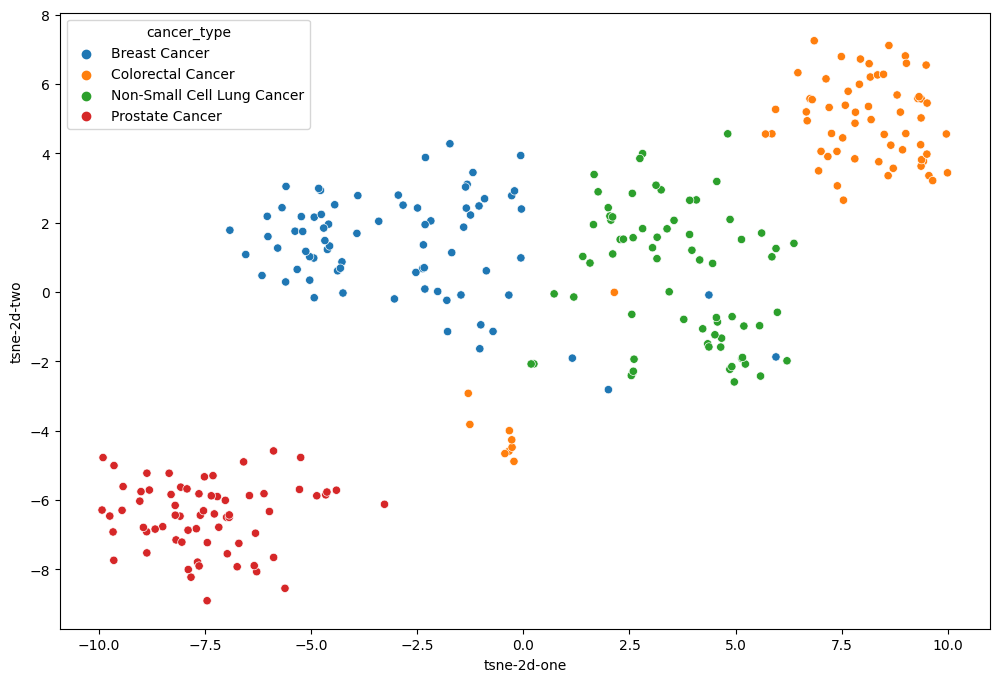

In [34]:
df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cancer_type",
    data=df,
    legend="full",
)

### PCA 50 dimensions and then t-SNE

In [35]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[genes].values)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.7194663286209106


In [36]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 2.4648563861846924 seconds


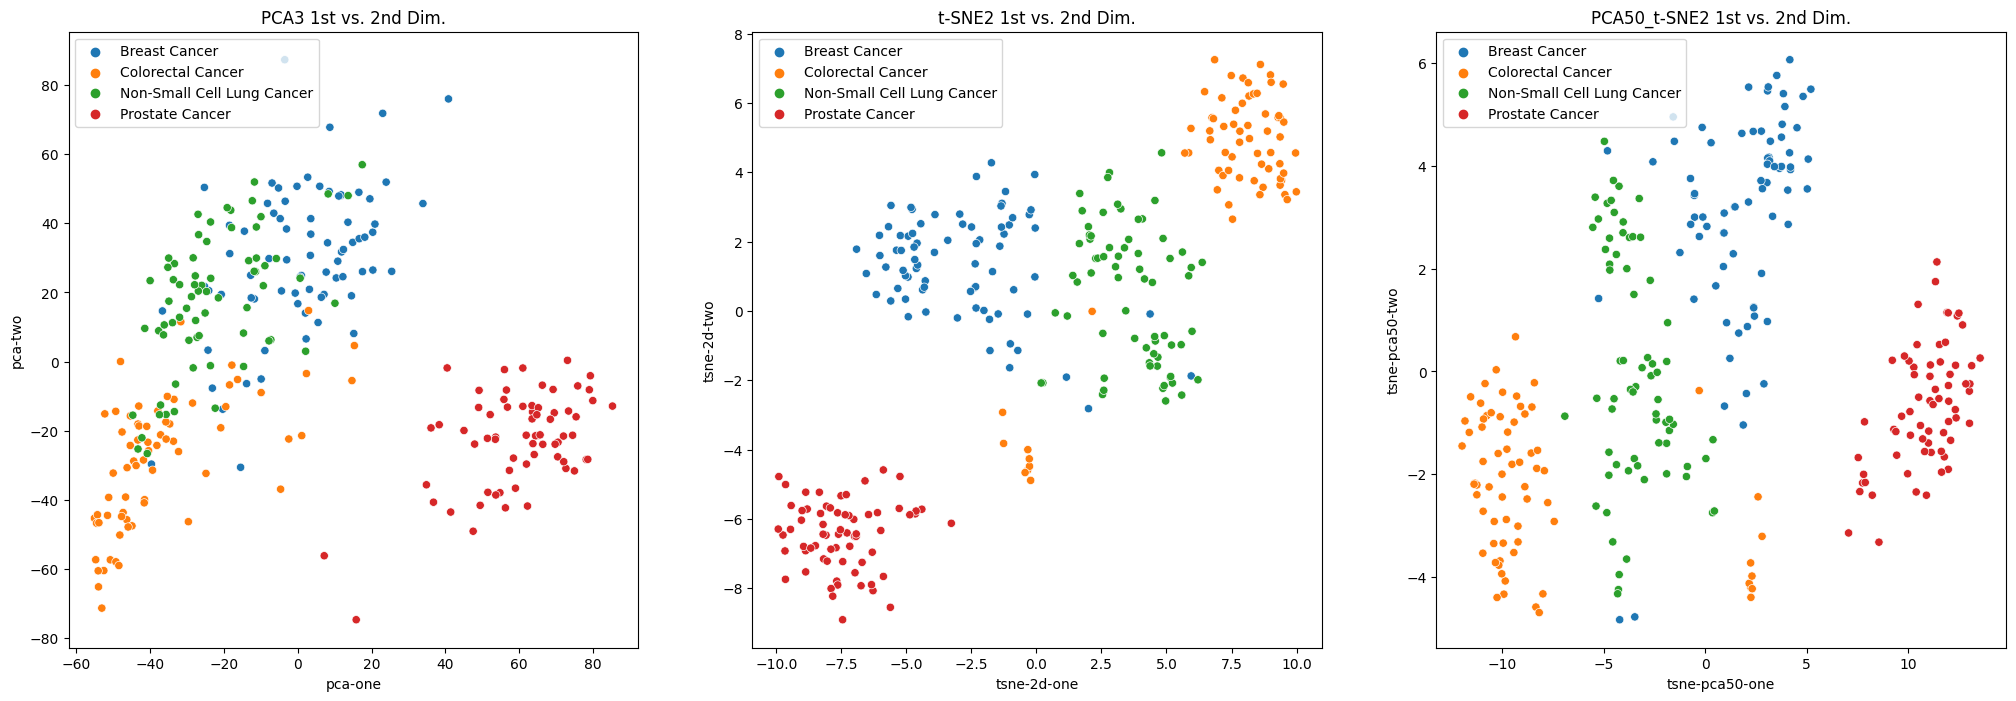

In [37]:
df['tsne-pca50-one'] = tsne_pca_results[:,0]
df['tsne-pca50-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(25, 8))
combs = [("pca-one", "pca-two"), ("tsne-2d-one", "tsne-2d-two"), ("tsne-pca50-one", "tsne-pca50-two")]
titles = ["PCA3 1st vs. 2nd Dim.", "t-SNE2 1st vs. 2nd Dim.", "PCA50_t-SNE2 1st vs. 2nd Dim."]

for i, (comb, title) in enumerate(zip(combs, titles)):
    ax = plt.subplot(1, 3, i+1)
    sns.scatterplot(
        x=comb[0], y=comb[1],
        hue="cancer_type",
        data=df,
        legend="full",
        ax=ax
    )
    plt.title(title)
    plt.legend(loc="upper left")
plt.show()

<Axes: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

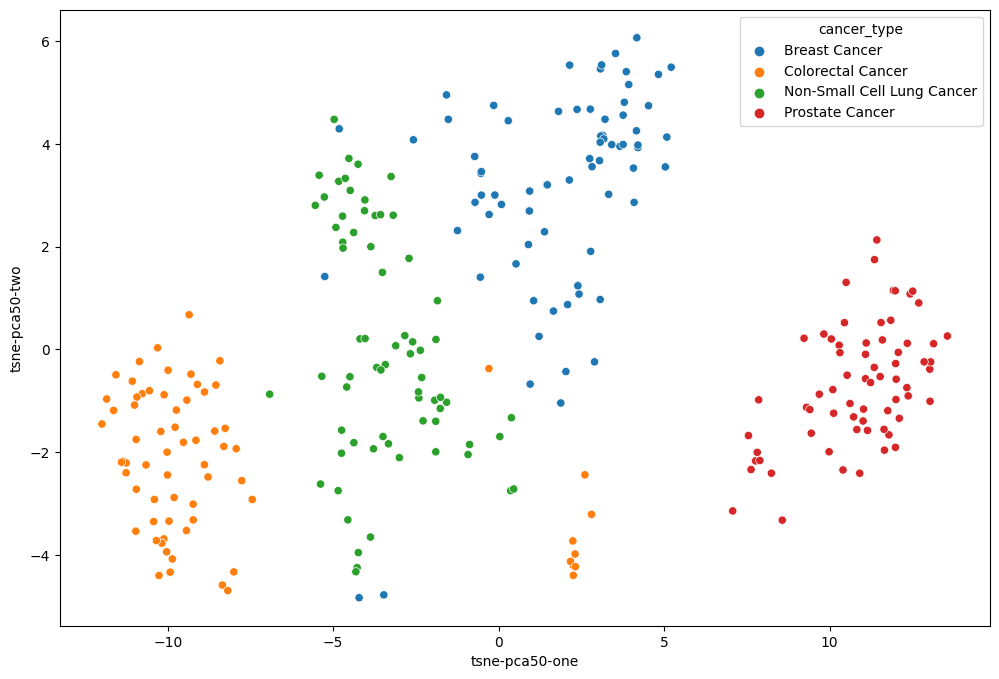

In [38]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="cancer_type",
    data=df,
    legend="full",
)

### PCA2D

In [39]:
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(df[genes].values)

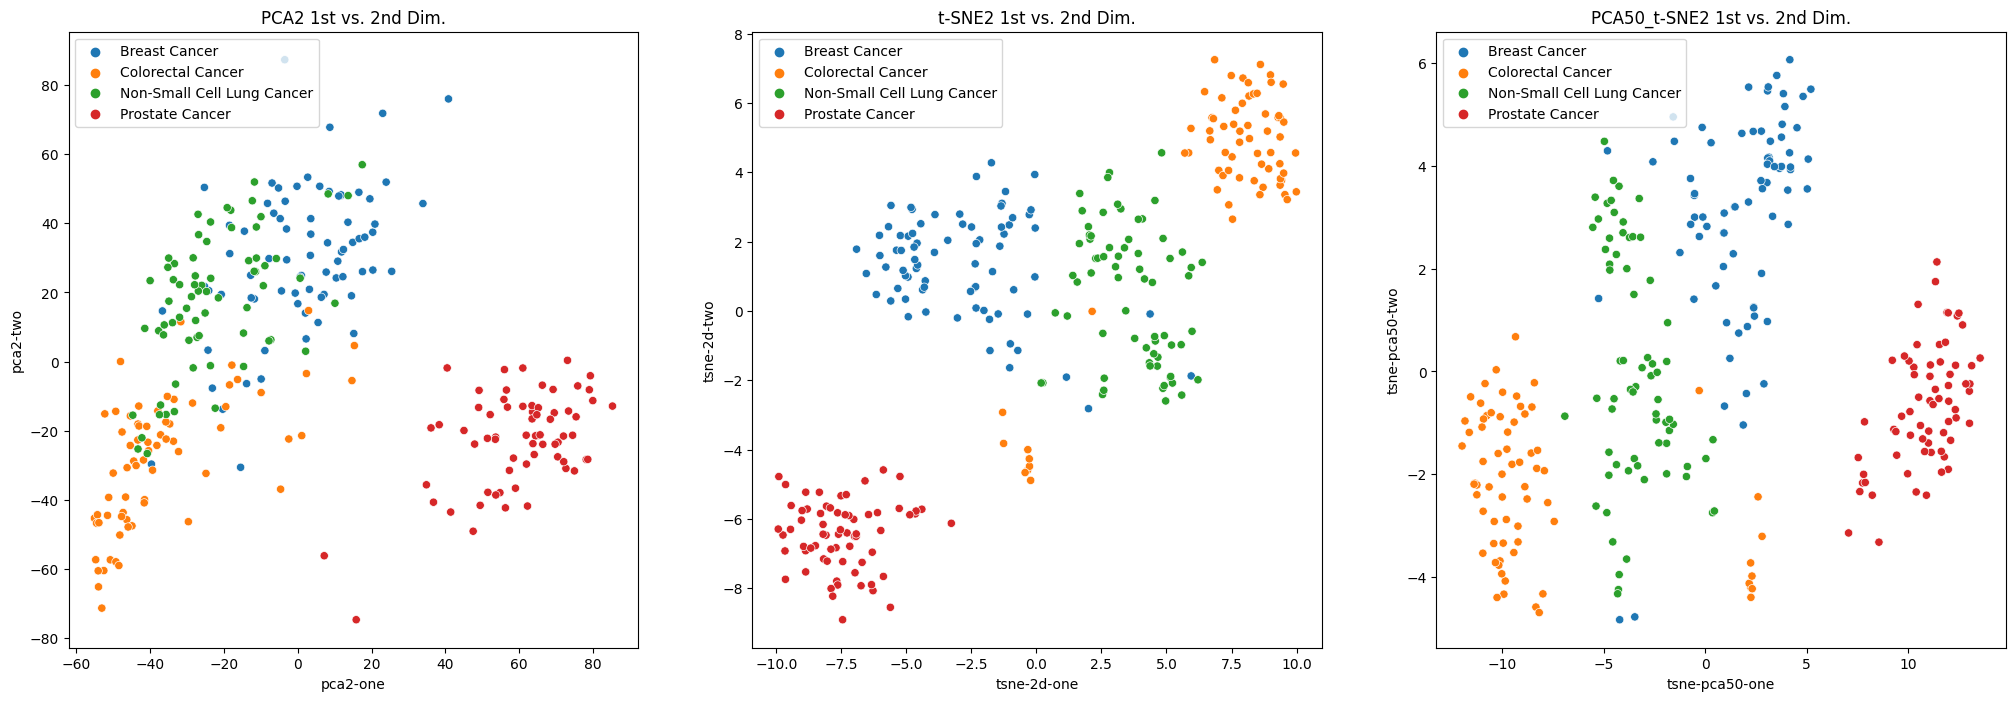

In [40]:
df['pca2-one'] = pca_result_2[:, 0]
df['pca2-two'] = pca_result_2[:, 1]

plt.figure(figsize=(25, 8))
combs = [("pca2-one", "pca2-two"), ("tsne-2d-one", "tsne-2d-two"), ("tsne-pca50-one", "tsne-pca50-two")]
titles = ["PCA2 1st vs. 2nd Dim.", "t-SNE2 1st vs. 2nd Dim.", "PCA50_t-SNE2 1st vs. 2nd Dim."]

for i, (comb, title) in enumerate(zip(combs, titles)):
    ax = plt.subplot(1, 3, i+1)
    sns.scatterplot(
        x=comb[0], y=comb[1],
        hue="cancer_type",
        data=df,
        legend="full",
        ax=ax
    )
    plt.title(title)
    plt.legend(loc="upper left")
plt.show()

## Hierarchical Clustering


Ref
- https://github.com/biomedbigdata/BiCoN
- https://warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/heatmap/

### UPGMA

### Neighbor Joining

### Biclustering

## Machine Learning Classification

In [41]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, fbeta_score, classification_report, \
                            roc_auc_score, \
                            ConfusionMatrixDisplay, RocCurveDisplay

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df[genes].values, df["cancer_type"], test_size=0.4)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 54715), (112, 54715), (168,), (112,))

### Random Forest

In [45]:
rfc = RandomForestClassifier()

In [46]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [3, 6],
    'max_leaf_nodes': [3, 6],
}

scoring = [
    "accuracy",
    # "precision",
    # "recall",
    # "f1-score"
]

gs = GridSearchCV(
    rfc,
    param_grid=param_grid,
    n_jobs=-1,
    scoring=scoring,
    refit='accuracy',
    verbose=2,
    return_train_score=True,
    cv=5,
)

In [47]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6], 'max_leaf_nodes': [3, 6],
                         'n_estimators': [10, 20, 30]},
             refit='accuracy', return_train_score=True, scoring=['accuracy'],
             verbose=2)

In [48]:
import pprint

best_params_ = gs.best_params_
best_score_ = gs.best_score_

print("Best score   :", best_score_)
print("Best params  :")
pprint.pprint(best_params_)

Best score   : 0.976114081996435
Best params  :
{'max_depth': 3, 'max_leaf_nodes': 6, 'n_estimators': 30}


In [49]:
gs.best_estimator_

RandomForestClassifier(max_depth=3, max_leaf_nodes=6, n_estimators=30)

In [50]:
gs.score(X_test, y_test)

0.9910714285714286

#### Evaluation

TRAIN SET RESULTS
Accuracy (Train)     : 0.9940476190476191
Precision (Train)    : 0.9941964285714286
F1-Score (Train)     : 0.9940502783391837
                            precision    recall  f1-score   support

             Breast Cancer       0.97      1.00      0.99        39
         Colorectal Cancer       1.00      0.98      0.99        43
Non-Small Cell Lung Cancer       1.00      1.00      1.00        42
           Prostate Cancer       1.00      1.00      1.00        44

                  accuracy                           0.99       168
                 macro avg       0.99      0.99      0.99       168
              weighted avg       0.99      0.99      0.99       168




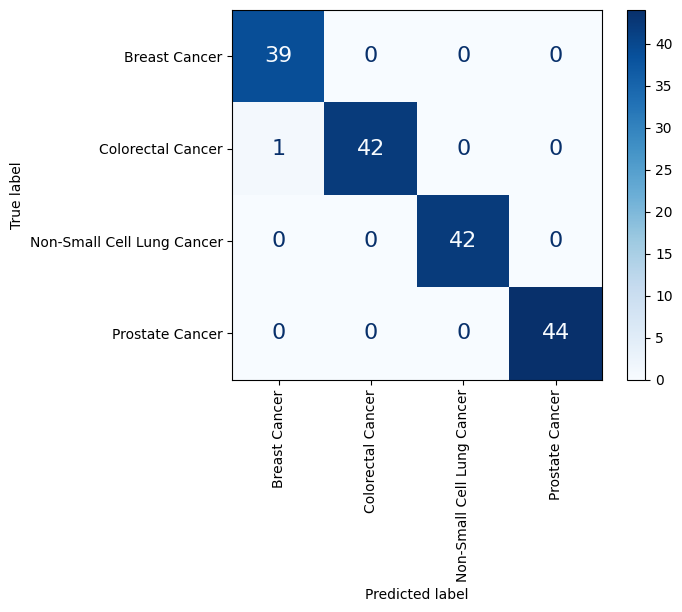


TEST SET RESULTS
Accuracy             : 0.9910714285714286
Precision            : 0.9913903061224489
F1-Score             : 0.9910897201390159
                            precision    recall  f1-score   support

             Breast Cancer       1.00      0.97      0.99        36
         Colorectal Cancer       1.00      1.00      1.00        26
Non-Small Cell Lung Cancer       0.96      1.00      0.98        27
           Prostate Cancer       1.00      1.00      1.00        23

                  accuracy                           0.99       112
                 macro avg       0.99      0.99      0.99       112
              weighted avg       0.99      0.99      0.99       112




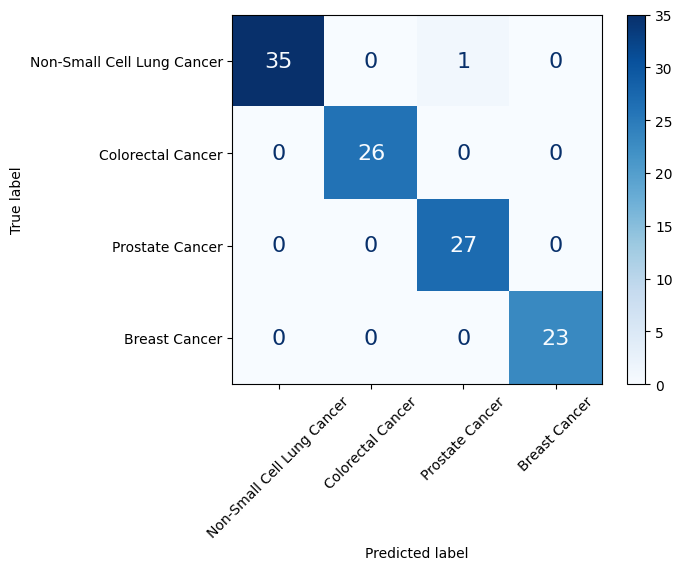

In [51]:
y_pred_train = gs.best_estimator_.predict(X_train)
AVERAGE = 'weighted'
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average=AVERAGE)
f1_train = f1_score(y_true=y_train, y_pred=y_pred_train, average=AVERAGE)
# sensitivity_train = recall_score(y_true=y_train, y_pred=y_pred_train)
# specificity_train = recall_score(y_true=y_train, y_pred=y_pred_train, pos_label=0)
# auc_train = roc_auc_score(y_train, y_pred_train, average=AVERAGE)
print("TRAIN SET RESULTS")
print("Accuracy (Train)     :", accuracy_train)
print("Precision (Train)    :", precision_train)
# print("Sensitivity (Train)  :", sensitivity_train)
# print("Specificity (Train)  :", specificity_train)
print("F1-Score (Train)     :", f1_train)
# print("AUC Score (Train)    :", auc_train)
print(classification_report(y_train, y_pred_train))
print()
LABEL_NAMES = list(y_train.unique())
ConfusionMatrixDisplay.from_predictions(
    y_train, y_pred_train,
    display_labels=LABEL_NAMES,
    cmap=plt.cm.Blues,
    text_kw={
        "fontsize": 16
    },
    xticks_rotation='vertical'
)
plt.show()
print()

y_pred = gs.best_estimator_.predict(X_test)
AVERAGE = 'weighted'
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=AVERAGE)
precision = precision_score(y_test, y_pred, average=AVERAGE)
# sensitivity = recall_score(y_true=y_test, y_pred=y_pred, pos_label=1, average='binary')
# specificity = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0, average='binary')

# auc = roc_auc_score(y_test, y_pred, average=AVERAGE)
print("TEST SET RESULTS")
print("Accuracy             :", accuracy)
print("Precision            :", precision)
# print("Sensitivity          :", sensitivity)
# print("Specificity          :", specificity)
print("F1-Score             :", f1)
# print("AUC Score            :", auc)
print(classification_report(y_test, y_pred))
print()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=y_test.unique(),
    cmap=plt.cm.Blues,
    text_kw={
        "fontsize": 16,
    },
    xticks_rotation=45
)
plt.show()

print()
# RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()
print()
# xgboost.plot_importance(gs.best_estimator_)
plt.show()

### PCA + Random Forest

In [52]:
pca = PCA()
rfc = RandomForestClassifier()

In [53]:
ml_pipeline = Pipeline(steps=[
    ('pca', pca),
    ('rfc', rfc)
])

In [54]:
from sklearn import set_config

set_config(display='diagram')
# Ref: https://stackoverflow.com/a/76488885
set_config(transform_output='pandas')
display(ml_pipeline)

Pipeline(steps=[('pca', PCA()), ('rfc', RandomForestClassifier())])

In [55]:
param_grid = {
    "pca__n_components": [2, 3, 4, 5, 10, 20],

    ## Random Forest hyperparam
    'rfc__n_estimators': [10, 20, 30],
    'rfc__max_depth': [3, 6],
    'rfc__max_leaf_nodes': [3, 6],
}

scoring = [
    "accuracy",
    # "precision",
    # "recall",
    # "f1-score"
]

gs = GridSearchCV(
    ml_pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    scoring=scoring,
    refit='accuracy',
    verbose=2,
    return_train_score=True,
    cv=5,
)

In [56]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'pca__n_components': [2, 3, 4, 5, 10, 20],
                         'rfc__max_depth': [3, 6],
                         'rfc__max_leaf_nodes': [3, 6],
                         'rfc__n_estimators': [10, 20, 30]},
             refit='accuracy', return_train_score=True, scoring=['accuracy'],
             verbose=2)

In [57]:
import pprint

best_params_ = gs.best_params_
best_score_ = gs.best_score_

print("Best score   :", best_score_)
print("Best params  :")
pprint.pprint(best_params_)

Best score   : 0.9584670231729057
Best params  :
{'pca__n_components': 10,
 'rfc__max_depth': 3,
 'rfc__max_leaf_nodes': 6,
 'rfc__n_estimators': 30}


In [58]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_pca__n_components', 'param_rfc__max_depth', 'param_rfc__max_leaf_nodes', 'param_rfc__n_estimators', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'split2_train_accuracy', 'split3_train_accuracy', 'split4_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy'])

In [59]:
gs.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=10)),
                ('rfc',
                 RandomForestClassifier(max_depth=3, max_leaf_nodes=6,
                                        n_estimators=30))])

In [60]:
df_cv_res = pd.DataFrame(gs.cv_results_)
df_cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,param_rfc__max_depth,param_rfc__max_leaf_nodes,param_rfc__n_estimators,params,split0_test_accuracy,...,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
0,0.460123,0.014345,0.012877,0.001319,2,3,3,10,"{'pca__n_components': 2, 'rfc__max_depth': 3, ...",0.764706,...,0.750267,0.038843,72,0.888060,0.708955,0.731343,0.859259,0.755556,0.788635,0.071552
1,0.466415,0.017144,0.013453,0.001657,2,3,3,20,"{'pca__n_components': 2, 'rfc__max_depth': 3, ...",0.794118,...,0.832977,0.045539,57,0.880597,0.850746,0.798507,0.874074,0.800000,0.840785,0.035336
2,0.499506,0.026018,0.014693,0.001632,2,3,3,30,"{'pca__n_components': 2, 'rfc__max_depth': 3, ...",0.676471,...,0.780036,0.088053,66,0.783582,0.723881,0.850746,0.881481,0.792593,0.806457,0.054999
3,0.440115,0.012732,0.011845,0.000375,2,3,6,10,"{'pca__n_components': 2, 'rfc__max_depth': 3, ...",0.794118,...,0.832977,0.062703,57,0.895522,0.888060,0.858209,0.903704,0.822222,0.873543,0.029908
4,0.461981,0.015506,0.014261,0.002138,2,3,6,20,"{'pca__n_components': 2, 'rfc__max_depth': 3, ...",0.764706,...,0.838859,0.067570,52,0.888060,0.880597,0.865672,0.896296,0.851852,0.876495,0.015919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.580528,0.017959,0.019202,0.002196,20,6,3,20,"{'pca__n_components': 20, 'rfc__max_depth': 6,...",0.823529,...,0.916756,0.057323,29,0.962687,0.977612,0.932836,0.940741,0.948148,0.952405,0.015989
68,0.600609,0.013669,0.019690,0.001616,20,6,3,30,"{'pca__n_components': 20, 'rfc__max_depth': 6,...",0.911765,...,0.934225,0.035353,21,0.962687,0.985075,0.947761,0.985185,0.962963,0.968734,0.014473
69,0.551486,0.012177,0.018154,0.001838,20,6,6,10,"{'pca__n_components': 20, 'rfc__max_depth': 6,...",0.941176,...,0.934403,0.012675,16,0.940299,0.970149,0.992537,0.992593,0.977778,0.974671,0.019246
70,0.579828,0.010593,0.017442,0.000730,20,6,6,20,"{'pca__n_components': 20, 'rfc__max_depth': 6,...",0.911765,...,0.958289,0.030142,2,0.977612,0.977612,0.992537,0.977778,1.000000,0.985108,0.009414


In [61]:
gs.score(X_test, y_test)

0.9464285714285714

#### Evaluation

TRAIN SET RESULTS
Accuracy (Train)     : 0.9821428571428571
Precision (Train)    : 0.9825789036544851
F1-Score (Train)     : 0.9821491676839512
                            precision    recall  f1-score   support

             Breast Cancer       0.95      0.97      0.96        39
         Colorectal Cancer       1.00      0.95      0.98        43
Non-Small Cell Lung Cancer       0.98      1.00      0.99        42
           Prostate Cancer       1.00      1.00      1.00        44

                  accuracy                           0.98       168
                 macro avg       0.98      0.98      0.98       168
              weighted avg       0.98      0.98      0.98       168




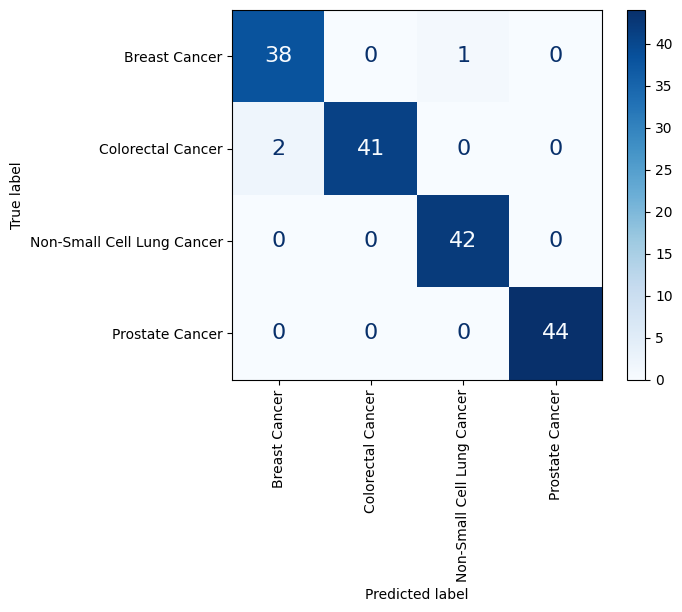


TEST SET RESULTS
Accuracy             : 0.9464285714285714
Precision            : 0.9469104308390023
F1-Score             : 0.9465353441403135
                            precision    recall  f1-score   support

             Breast Cancer       0.94      0.92      0.93        36
         Colorectal Cancer       0.89      0.92      0.91        26
Non-Small Cell Lung Cancer       0.96      0.96      0.96        27
           Prostate Cancer       1.00      1.00      1.00        23

                  accuracy                           0.95       112
                 macro avg       0.95      0.95      0.95       112
              weighted avg       0.95      0.95      0.95       112




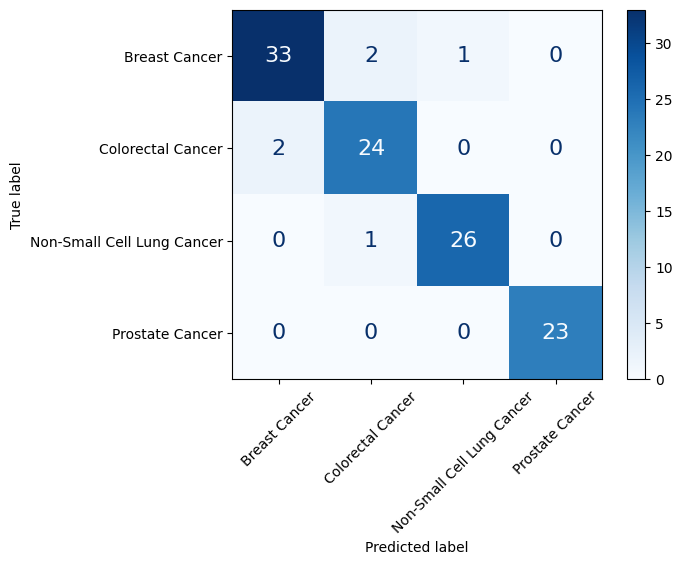

In [62]:
y_pred_train = gs.best_estimator_.predict(X_train)
AVERAGE = 'weighted'
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average=AVERAGE)
f1_train = f1_score(y_true=y_train, y_pred=y_pred_train, average=AVERAGE)
# sensitivity_train = recall_score(y_true=y_train, y_pred=y_pred_train)
# specificity_train = recall_score(y_true=y_train, y_pred=y_pred_train, pos_label=0)
# auc_train = roc_auc_score(y_train, y_pred_train, average=AVERAGE)
print("TRAIN SET RESULTS")
print("Accuracy (Train)     :", accuracy_train)
print("Precision (Train)    :", precision_train)
# print("Sensitivity (Train)  :", sensitivity_train)
# print("Specificity (Train)  :", specificity_train)
print("F1-Score (Train)     :", f1_train)
# print("AUC Score (Train)    :", auc_train)
print(classification_report(y_train, y_pred_train))
print()
ConfusionMatrixDisplay.from_predictions(
    y_train, y_pred_train,
    display_labels=LABEL_NAMES,
    cmap=plt.cm.Blues,
    text_kw={
        "fontsize": 16
    },
    xticks_rotation='vertical'
)
plt.show()
print()

y_pred = gs.best_estimator_.predict(X_test)
AVERAGE = 'weighted'
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=AVERAGE)
precision = precision_score(y_test, y_pred, average=AVERAGE)
# sensitivity = recall_score(y_true=y_test, y_pred=y_pred, pos_label=1, average='binary')
# specificity = recall_score(y_true=y_test, y_pred=y_pred, pos_label=0, average='binary')

# auc = roc_auc_score(y_test, y_pred, average=AVERAGE)
print("TEST SET RESULTS")
print("Accuracy             :", accuracy)
print("Precision            :", precision)
# print("Sensitivity          :", sensitivity)
# print("Specificity          :", specificity)
print("F1-Score             :", f1)
# print("AUC Score            :", auc)
print(classification_report(y_test, y_pred))
print()
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=LABEL_NAMES,
    cmap=plt.cm.Blues,
    text_kw={
        "fontsize": 16,
    },
    xticks_rotation=45
)
plt.show()

print()
# RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()
print()
# xgboost.plot_importance(gs.best_estimator_)
plt.show()

In [63]:
y_pred_proba = gs.predict_proba(X_test)
# auc = roc_auc_score(y_test, y_pred, average=AVERAGE)
# print("AUC Score            :", auc)
# RocCurveDisplay.from_predictions(y_test, y_pred)

In [64]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(112, 4)

In [65]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.99


In [66]:
n_classes = 4

In [67]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.99


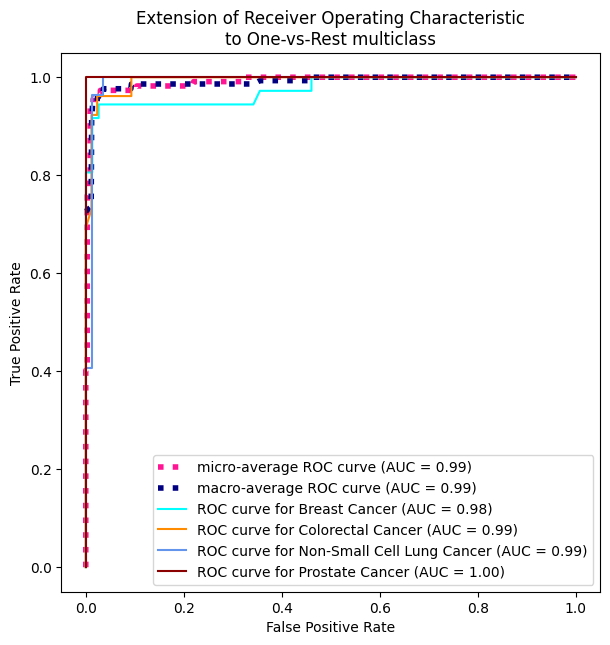

In [68]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(7, 7))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "darkred"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_proba[:, class_id],
        name=f"ROC curve for {gs.best_estimator_.classes_[class_id]}",
        color=color,
        ax=ax,
        # plot_chance_level=True,
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()